# Лабораторная работа 5. Рекомендации по формализации и расчетам характеристик подсистем КИС в виде разомкнутых или замкнутых стохастических моделей

## Задание 1.

Для  одноканальной системы массового обслуживания с ограничением на длину очереди $m$:
- Cоставьте дифференциальные уравнения для вероятностей нахождения в заданных состояниях в зависимости от времени. 
- Найдите эти вероятности при определенном в соответствии с вариантом значении $t$, а также при $t\rightarrow \infty$. 

Канал иногда может выходить из строя. Заявка, которая обслуживается в момент отказа канала ставится в очередь, если там есть места, в противном случае она покидает систему необслуженной. Входящий поток, поток обслуживания, поток отказов и поток восстановления простейшие с соответствующими интенсивностями $\lambda, \mu, \nu, \gamma$. Количество клиентов, от которых могут поступать заявки на обслуживание $k$. 

Начальные условия $P_0(0)=1$. 

Найти (теоретически и экспериментально):
 - вероятность простоя;
 - вероятность образования очереди;
 - абсолютную пропускную способность;
 - среднюю длину очереди;
 - среднее время нахождения заявок в системе;
 - среднее число заявок в системе.
 - среднее время нахождения в очереди.

In [17]:
Variant<-8
set.seed(Variant) 
k<-sample(c(4:18),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu) {
  current<-lambda;
  lambda<-mu;
  mu<-current
}
gamma<-runif(1)
nu<-runif(1)
if (gamma<nu) {
  current<-nu;
  nu<-gamma;
  gamma<-current
}
if (sample(c(1:2),1)) {
  m<-sample(c(4:7),1)
} else {
  m<-"inf"
}
t<-runif(1)
print("--------------")
View(data.frame(lambda, mu, nu, gamma, k, m, t))


[1] "--------------"


lambda,mu,nu,gamma,k,m,t
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
0.6518713,0.799658,0.3215092,0.7189275,7,5,0.769147


Теоретическая часть:

Мы имеем замкнутую СМО с отказами вида $M/M/1/m$, для которой схема гибели-размножения представима в следующем виде:

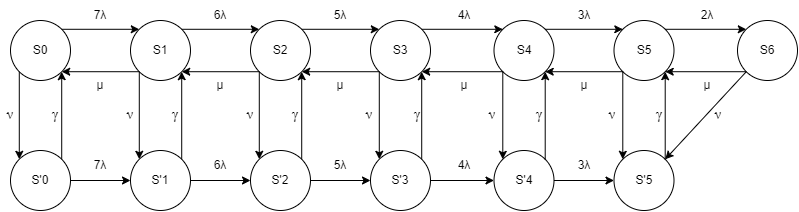

Отметим, что в случае, если отказ системы произойдет тогда, когда она находится в состоянии $S_6$, то обрабатываемая заявка будет потеряна.

Опишем состояния системы в виде таблицы:

|Код состояния|Описание|
|-|-|
|$S_0$ | нет выполняемых задач, система исправна|
|$S_i, i \in [1, 6]$| система выполняет задачу, в очереди $i-1$ заявок, система исправна |
|$S'_i, i \in [0, 5]$|в очереди $i$ заявок, система неисправна |


Для удобства будем записывать $P(S'_i), i \in [0, 5]$ в виде $P_{0i}$

Составим дифференциальные уравнения Колмогорова для вероятностей нахождения системы в заданных состояниях в зависимости от времени:

$$\frac{dP_0(t)}{dt}=-(7\lambda+\nu) \cdot P_0(t)+\mu\cdot P_1(t)+\gamma\cdot P_{00}(t)$$

$$\frac{dP_{1}(t)}{dt}=7\lambda \cdot P_0(t) -(6\lambda+\nu + \mu) \cdot P_1(t)+\mu\cdot P_2(t)+\gamma\cdot P_{01}(t)$$

$$\frac{dP_{2}(t)}{dt}=6\lambda \cdot P_1(t) -(5\lambda+\nu+ \mu) \cdot P_2(t)+\mu\cdot P_3(t)+\gamma\cdot P_{02}(t)$$

$$\frac{dP_{3}(t)}{dt}=5\lambda \cdot P_2(t) -(4\lambda+\nu + \mu) \cdot P_3(t)+\mu\cdot P_4(t)+\gamma\cdot P_{03}(t)$$

$$\frac{dP_{4}(t)}{dt}=4\lambda \cdot P_3(t) -(3\lambda+\nu + \mu) \cdot P_4(t)+\mu\cdot P_5(t)+\gamma\cdot P_{04}(t)$$

$$\frac{dP_{5}(t)}{dt}=3\lambda \cdot P_4(t) -(2\lambda+\nu + \mu) \cdot P_5(t)+\mu\cdot P_6(t)+\gamma\cdot P_{05}(t)$$

$$\frac{dP_{6}(t)}{dt}=2\lambda \cdot P_5(t) - (\nu + \mu) \cdot P_6(t)$$

$$\frac{dP_{00}(t)}{dt}=-(7\lambda+\gamma) \cdot P_{00}(t)+\nu\cdot P_{0}(t)$$

$$\frac{dP_{01}(t)}{dt}=-(6\lambda+\gamma) \cdot P_{01}(t)+\nu\cdot P_{1}(t) + 7\lambda\cdot P_{00}(t)$$

$$\frac{dP_{02}(t)}{dt}=-(5\lambda+\gamma) \cdot P_{02}(t)+\nu\cdot P_{2}(t) + 6\lambda\cdot P_{01}(t)$$

$$\frac{dP_{03}(t)}{dt}=-(4\lambda+\gamma) \cdot P_{03}(t)+\nu\cdot P_{3}(t) + 5\lambda\cdot P_{02}(t)$$

$$\frac{dP_{04}(t)}{dt}=-(3\lambda+\gamma) \cdot P_{04}(t)+\nu\cdot P_{4}(t) + 4\lambda\cdot P_{03}(t)$$

$$\frac{dP_{05}(t)}{dt}=-\gamma \cdot P_{05}(t)+\nu\cdot P_{5}(t) + \nu\cdot P_{6}(t) + 3\lambda\cdot P_{04}(t)$$

Учтем уравнение нормировки:

$$ P_{0}+P_{1}+P_{2}+P_{3}+P_{4}+P_{5}+P_{6}+P_{00}+P_{01}+P_{02}+P_{03}+P_{04}+P_{05} = 1 $$


Найдем в Maksima численные значения финальных вероятностей:
```
lambda:0.6518713$ mu:0.799658$ nu:0.3215092$ gamma:0.7189275$
solutions:solve(
  [
                - (7*lambda+nu)*P0      + mu*P1 + gamma*P00 =0, /*dP0*/
    7*lambda*P0 - (6*lambda+nu+mu)*P1   + mu*P2 + gamma*P01 =0, /*dP1*/
    6*lambda*P1 - (5*lambda+nu+mu)*P2   + mu*P3 + gamma*P02 =0, /*dP2*/
    5*lambda*P2 - (4*lambda+nu+mu)*P3   + mu*P4 + gamma*P03 =0, /*dP3*/
    4*lambda*P3 - (3*lambda+nu+mu)*P4   + mu*P5 + gamma*P04 =0, /*dP4*/
    3*lambda*P4 - (2*lambda+nu+mu)*P5   + mu*P6 + gamma*P05 =0, /*dP5*/
    2*lambda*P5 - (nu+mu)*P6                                =0, /*dP6*/

    - (7*lambda+gamma)*P00     + nu*P0                      =0, /*dP00*/
    - (6*lambda+gamma)*P01     + nu*P1       + 7*lambda*P00 =0, /*dP01*/
    - (5*lambda+gamma)*P02     + nu*P2       + 6*lambda*P01 =0, /*dP02*/
    - (4*lambda+gamma)*P03     + nu*P3       + 5*lambda*P02 =0, /*dP03*/
    - (3*lambda+gamma)*P04     + nu*P4       + 4*lambda*P03 =0, /*dP04*/
    - (         gamma)*P05     + nu*P5+nu*P6 + 3*lambda*P04 =0, /*dP05*/

    P0+P1+P2+P3+P4+P5+P6 + P00+P01+P02+P03+P04+P05          =1  /*нормировка*/
  ],
  [P0,P1,P2,P3,P4,P5,P6,P00,P01,P02,P03,P04,P05]
)$
float(solutions);
```
Получим результат:

```
P0=1.7854803769355*10^-4
P1=0.001080867012990563
P2=0.005706138528808608
P3=0.02548115259079074
P4=0.09286116299643749
P5=0.2615437886542898
P6=0.3041346366839793
P00=1.086795677258102*10^-5
P01=8.576391647614688*10^-5
P02=5.454658963122835*10^-4
P03=0.002997310826529981
P04=0.01408509206327145
P05=0.2912892048356475
```

Убедимся, что сумма финальных вероятностей действительно равна единице:



In [19]:
sum(
  c(
    1.7854803769355*10^-4,
    0.001080867012990563,
    0.005706138528808608,
    0.02548115259079074,
    0.09286116299643749,
    0.2615437886542898,
    0.3041346366839793,
    1.086795677258102*10^-5,
    8.576391647614688*10^-5,
    5.454658963122835*10^-4,
    0.002997310826529981,
    0.01408509206327145,
    0.2912892048356475
  )
)

[1] 1

Найдем вероятности нахождения системы в состояниях $S_0,...,S_6,S_{00},...,S_{05}$ при $t = 0.769147$:

```
lambda:0.6518713$ mu:0.799658$ nu:0.3215092$ gamma:0.7189275$
sol: rk([
    - (7*lambda+nu)*P0      + mu*P1 + gamma*P00, /*dP0*/
    7*lambda*P0 - (6*lambda+nu+mu)*P1 + mu*P2 + gamma*P01, /*dP1*/
    6*lambda*P1 - (5*lambda+nu+mu)*P2 + mu*P3 + gamma*P02, /*dP2*/
    5*lambda*P2 - (4*lambda+nu+mu)*P3 + mu*P4 + gamma*P03, /*dP3*/
    4*lambda*P3 - (3*lambda+nu+mu)*P4 + mu*P5 + gamma*P04, /*dP4*/
    3*lambda*P4 - (2*lambda+nu+mu)*P5 + mu*P6 + gamma*P05, /*dP5*/
    2*lambda*P5 - (nu+mu)*P6, /*dP6*/

    - (7*lambda+gamma)*P00     + nu*P0                      , /*dP00*/
    - (6*lambda+gamma)*P01     + nu*P1       + 7*lambda*P00, /*dP01*/
    - (5*lambda+gamma)*P02     + nu*P2       + 6*lambda*P01, /*dP02*/
    - (4*lambda+gamma)*P03     + nu*P3       + 5*lambda*P02, /*dP03*/
    - (3*lambda+gamma)*P04     + nu*P4       + 4*lambda*P03, /*dP04*/
    - (         gamma)*P05     + nu*P5+nu*P6    + 3*lambda*P04 /*dP05*/
    ],
    [P0,P1,P2,P3,P4,P5,P6,P00,P01,P02,P03,P04,P05],
    [1,0,0,0,0,0,0,0,0,0,0,0,0],
    [t, 0, 1, 0.001]
)$

sol[770];

```
Получим:
```
0.769,
0.06042750952055444,
0.1555887916191998,
0.2288318688228228,
0.2094632526611382,
0.1218296494705794,
0.04414993318635668,
0.009530793237712418,
0.007473687229570278,
0.02700843667965347,
0.04657789961120407,
0.04680143407522121,
0.02892723214230981,
0.01338951174367726
```

Убедимся, что сумма полученных вероятностей равна единице:

In [21]:
sum(
    0.06042750952055444,
    0.1555887916191998,
    0.2288318688228228,
    0.2094632526611382,
    0.1218296494705794,
    0.04414993318635668,
    0.009530793237712418,
    0.007473687229570278,
    0.02700843667965347,
    0.04657789961120407,
    0.04680143407522121,
    0.02892723214230981,
    0.01338951174367726
)

[1] 1

 - вероятность простоя;
 - вероятность образования очереди;
 - абсолютную пропускную способность;
 - среднюю длину очереди;
 - среднее время нахождения заявок в системе;
 - среднее число заявок в системе.
 - среднее время нахождения в очереди.

Рассчитаем основные характеристики системы:
- вероятность простоя:
$$P_{пр}=P_0$$
- вероятность образования очереди:
$$P_{оч}=P_2+P_3+P_4+P_5+P_6+P_{01}+P_{02}+P_{03}+P_{04}+P_{05}$$
- абсолютная пропускная способность:
$$\lambda' =  \lambda \cdot (1 - P_{отк})$$
$$P_{отк}=P_6+P_{05} $$
$$ \lambda'  = \lambda \cdot (1 - P_6-P_{05}) $$
- среднее число заявок в системе:
$$L_{сист} = \sum_{i=1}^6 i \cdot P_i + \sum_{i=1}^5 i \cdot P_{0i} $$
- среднее время нахождения заявок в системе:
$$T_{сист} = \frac{L_{сист}}{\lambda'} $$
- средняя длина очереди:
$$L_{оч} = \sum_{i=2}^6 (i - 1) \cdot P_i + \sum_{i=1}^5 i \cdot P_{0i} $$
- среднее время нахождения в очереди:
$$W_{оч} = \frac{L_{оч}}{\lambda'} $$




Теоритическая часть, реализованная в среде R:

In [143]:
P0=1.7854803769355*10^-4
P1=0.001080867012990563
P2=0.005706138528808608
P3=0.02548115259079074
P4=0.09286116299643749
P5=0.2615437886542898
P6=0.3041346366839793
P00=1.086795677258102*10^-5
P01=8.576391647614688*10^-5
P02=5.454658963122835*10^-4
P03=0.002997310826529981
P04=0.01408509206327145
P05=0.2912892048356475

lambda = 0.6518713
mu = 0.799658
nu = 0.3215092
gamma = 0.7189275

Ppr = P0
Poch = P2 + P3 + P4 + P5 + P6 + P01 + P02 + P03 + P04 + P05
lambda1 = lambda * (1 - P6 - P05)
Lsist = 1 * P1 + 2 * P2 + 3 * P3 + 4 * P4 + 5 * P5 + 6 * P6 + 
        1 * P01 + 2 * P02 + 3 * P03 + 4 * P04 + 5 * P05
Tsist = Lsist / lambda1
Loch = 1 * P2 + 2 * P3 + 3 * P4 + 4 * P5 + 5 * P6 +
        1 * P01 + 2 * P02 + 3 * P03 + 4 * P04 + 5 * P05
Woch = Loch / lambda1

printf <- function(...)print(sprintf(...))

printf("Вероятность простоя %f", Ppr)
printf("Вероятность образования очереди %f", Poch)
printf("Абсолютная пропускная способность %f", lambda1)
printf("Среднее число заявок в системе %f", Lsist)
printf("Среднее время нахождения заявок в системе %f", Tsist)
printf("Средняя длина очереди %f", Loch)
printf("Среднее время нахождения в очереди %f", Woch)

[1] "Вероятность простоя 0.000179"
[1] "Вероятность образования очереди 0.998730"
[1] "Абсолютная пропускная способность 0.263732"
[1] "Среднее число заявок в системе 5.115863"
[1] "Среднее время нахождения заявок в системе 19.397991"
[1] "Средняя длина очереди 4.425055"
[1] "Среднее время нахождения в очереди 16.778632"


In [46]:
printf("Вероятность отклонения %f", P6 + P05)
printf("Вероятность не отклонения %f", 1 - P6 - P05)

[1] "Вероятность отклонения 0.595424"
[1] "Вероятность не отклонения 0.404576"


Экспериментальная часть, реализованная в среде R:

In [6]:
k <- 7                # количество клиентов
m <- 5                # максимальная длина очереди
lambda <- 0.6518713   # интенсивность поступления заявок на сервер
mu <- 0.799658        # интенсивность обработки заявок
nu <- 0.3215092       # интенсивность поломки сервера
gamma <- 0.7189275    # интенсивность восстановления сервера

In [160]:
true <- 1
false <- 0

N <- 10000

curTime <- 0                    # текущее время симуляции
dt <- 0.1                       # Тик (Дельта времени)

progSendAt <- rexp(k, lambda)   # моменты времени, в которые программисты отправляют свои программы
progReceiveAt <- double(k)      # моменты времени, в которые программисты получают ответ от сервера
progWaits <- integer(k)         # флаг ожидания программистом ответа от сервера

qTasks <- c()                   # очередь задач
curTask <- 0                    # id клиента, задачу которого выполняет сервер
serverTask <- 0                 # задача, которая выполняется на сервере
serverCrashesAt <- rexp(1, nu)  # момент времени, в который сломается сервер
serverRestoresAt <- 0           # момент времени, в который сервер починится
serverIsCrashed <- false        # флаг того, что сервер сломан

# Статистические параметры
numOfReqs <- 0                  # количество заявок, поступивших в систему
numOfSuccessfulReqs <- 0        # количество успешно обработанных заявок
numOfRejectedReqs <- 0          # количество отклоненных заявок
pDowntime <- 0                  # количество моментов простоя системы
pQueue <- 0                     # количество раз, когда к серверу есть очередь
qLenTotal <- 0                  # суммарная длина очереди
LsystTotal <- 0                 # суммарное число запросов в системе
spentTimeInSystemTotal <- 0     # суммарное время нахождения заявок в системе
spentTimeInQueueTotal <- 0      # суммарное время нахождения заявок в очередях

for (i in 1:N) {
  curTime <- curTime + dt

  if (serverIsCrashed == false && curTask == 0 && length(qTasks) == 0) {
    pDowntime <- pDowntime + 1
  }
  if (length(qTasks) > 0) {
    pQueue <- pQueue + 1
  }
  qLenTotal <- qLenTotal + length(qTasks)
  LsystTotal <- LsystTotal + length(qTasks)
  if (curTask != 0) {
    LsystTotal <- LsystTotal + 1
  }

  # Обработка событий на сервере
  if (curTime >= serverCrashesAt && serverIsCrashed == false) { # Поломка сервера
    if (curTask != 0) {                                         # Если обрабатываем задачу, то:
      if (length(qTasks) < m) {                                   # Если очередь не заполнена, то:
        qTasks = append(qTasks, curTask)                              # Засовываем задачу в конец очереди
      } else {                                                    # Если очередь заполнена, то:
        numOfRejectedReqs <- numOfRejectedReqs + 1
        spentTimeInSystem <- serverCrashesAt - progSendAt[curTask]
        spentTimeInSystemTotal <- spentTimeInSystemTotal + spentTimeInSystem

        progWaits[curTask] <- false                                   # Удаляем флаг ожидания клиентом ответа от сервера      
        progSendAt[curTask] <- serverCrashesAt + rexp(1, lambda)      # Ставим момент времени, в который программист отправит новую программу
      }
      curTask <- 0                                                # Удаляем задачу с сервера
      serverTask <- 0
    }
    serverIsCrashed <- true                                     # Переходим из состояния Sx в состояние S0x
    serverRestoresAt <- serverCrashesAt + rexp(1, gamma)        # Задаем время починки
    serverCrashesAt <- 0
  } else if (curTime >= serverRestoresAt && serverIsCrashed == true) {  # Починка сервера  
      if (length(qTasks) > 0) {                                 # Если в очереди есть задачи, то:
        curTask <- qTasks[1]                                      # Выхватываем первую задачу из очереди, начинаем её обрабатывать
        qTasks <- qTasks[-1]                                      # Уменьшаем очередь
        handleDuration <- rexp(1, mu)
        serverTask <- handleDuration

        spentTimeInQueue <- serverRestoresAt - progSendAt[curTask]
        spentTimeInQueueTotal <- spentTimeInQueueTotal + spentTimeInQueue
      }
    serverIsCrashed <- false                                   # Переходим из состояния S0x в Sx
    serverCrashesAt <- serverRestoresAt + rexp(1, nu)          # Задаем время поломки
    serverRestoresAt <- 0
  }

  # Обработка задачи на сервере
  if (curTask != 0 && serverIsCrashed == false) {
    serverTask <- serverTask - dt
    if (serverTask <= 0) {
      numOfSuccessfulReqs <- numOfSuccessfulReqs + 1

      serverProcessedAt <- curTime + serverTask # Устранение погрешности
      progReceiveAt[curTask] <- serverProcessedAt
      curTask <- 0
      serverTask <- 0
      if (length(qTasks) > 0) {
        curTask <- qTasks[1]                                      # Выхватываем первую задачу из очереди, начинаем её обрабатывать
        qTasks <- qTasks[-1]                                      # Уменьшаем очередь
        handleDuration <- rexp(1, mu)
        serverTask <- handleDuration

        spentTimeInQueue <- serverProcessedAt - progSendAt[curTask]
        spentTimeInQueueTotal <- spentTimeInQueueTotal + spentTimeInQueue
      }
    }
  }
  
  # Обработка клиентов
  for (j in 1:k) {
    if (progWaits[j] == true) {                                           # Программист ждет ответа от сервера
      if (progReceiveAt[j] != 0 && curTime >= progReceiveAt[j]) {         # Сервер проверил программу
        spentTimeInSystem <- progReceiveAt[j] - progSendAt[j]
        spentTimeInSystemTotal <- spentTimeInSystemTotal + spentTimeInSystem

        progSendAt[j] <- progReceiveAt[j] + rexp(1, lambda)
        progReceiveAt[j] <- 0
        progWaits[j] <- false
      }
    } else if (curTime >= progSendAt[j]) {
      numOfReqs <- numOfReqs + 1
      if (curTask == 0 && serverIsCrashed == false) {
        handleDuration <- rexp(1, mu)
        curTask <- j
        serverTask <- handleDuration
        progWaits[j] <- true
      } else if (length(qTasks) < m) {
        qTasks <- append(qTasks, j)
        progWaits[j] <- true
      } else {
        numOfRejectedReqs <- numOfRejectedReqs + 1
        progSendAt[j] <- progSendAt[j] + rexp(1, lambda)
      }
    }
  }
}

In [161]:
numOfSuccessfulReqs
numOfRejectedReqs
numOfSuccessfulReqs + numOfRejectedReqs
numOfReqs
# Разница из-за того, что процесс обрывается при i = N, разница -- это число заявок в системе, которые остались необработанными/не откинутыми

numOfRejectedReqs / numOfReqs
P05 + P6

numOfSuccessfulReqs / numOfReqs
1 - P6 - P05

[1] 521

[1] 677

[1] 1198

[1] 1203

[1] 0.5627598

[1] 0.5954238

[1] 0.433084

[1] 0.4045762

In [162]:
printf("Вероятность простоя %f", pDowntime/N)
printf("Вероятность образования очереди %f", pQueue/N)
printf("Абсолютная пропускная способность %f", lambda * (numOfSuccessfulReqs/numOfReqs))
printf("Среднее число заявок в системе %f", LsystTotal/N)
printf("Среднее время нахождения заявок в системе %f", spentTimeInSystemTotal/numOfReqs)
printf("Средняя длина очереди %f", qLenTotal/N)
printf("Среднее время нахождения в очереди %f", spentTimeInQueueTotal/numOfReqs)

[1] "Вероятность простоя 0.000900"
[1] "Вероятность образования очереди 0.998000"
[1] "Абсолютная пропускная способность 0.282315"
[1] "Среднее число заявок в системе 5.182700"
[1] "Среднее время нахождения заявок в системе 4.277606"
[1] "Средняя длина очереди 4.474900"
[1] "Среднее время нахождения в очереди 4.423511"


## Дополнительное задание

В сети имеется $m$ маршрутизаторов (топология связи маршрутизаторов - полный граф (каждый с каждым), или звезда, или кольцо  - в зависимости от варианта). Каждый маршрутизатор обслуживает свою сеть из $z_i$ компьютеров. Каждый компьютер с интенсивностью $\lambda$ выходит из строя и с интенсивностью $\mu$ восстанавливается. На случайный маршрутизатов попадает пакет с определенным значением TTL и определенным IP адресом назначения. Блуждания пакета от маршрутизатора к маршрутизатору происходят случайно. Если пакет оказался на маршрутизаторе, который отвечает за сеть назначения то он тут же перенаправляется на целевой компьютер и получает обслуживание, если это компьютер исправен. Постройте иммитационную модель для оценки вероятности того, что пакет достигнет своей цели, вероятности того, что он получит отказ (его TTL после очередного хопа станет равно нулю) для заданной сети.

In [ ]:
Variant<-1
set.seed(Variant) 
m<-sample(c(3:6),1)
mu<-runif(1)
lambda<-runif(1)
if (lambda>mu){current<-lambda; lambda<-mu; mu<-current}
z<-sample(c(1:5), m, replace=TRUE)
ttl<-sample(c(10:64),1)
topology<-sample(c("полный", "кольцо", "звезда"),1)
View(data.frame(m, lambda, mu, ttl, topology))
print(z)

m,lambda,mu,ttl,topology
<int>,<dbl>,<dbl>,<int>,<chr>
3,0.3721239,0.5728534,32,звезда


[1] 1 2 5
